In [1]:
import numpy as np
import pandas as pd
from luwiji.knn import illustration

## Avoid data leakage

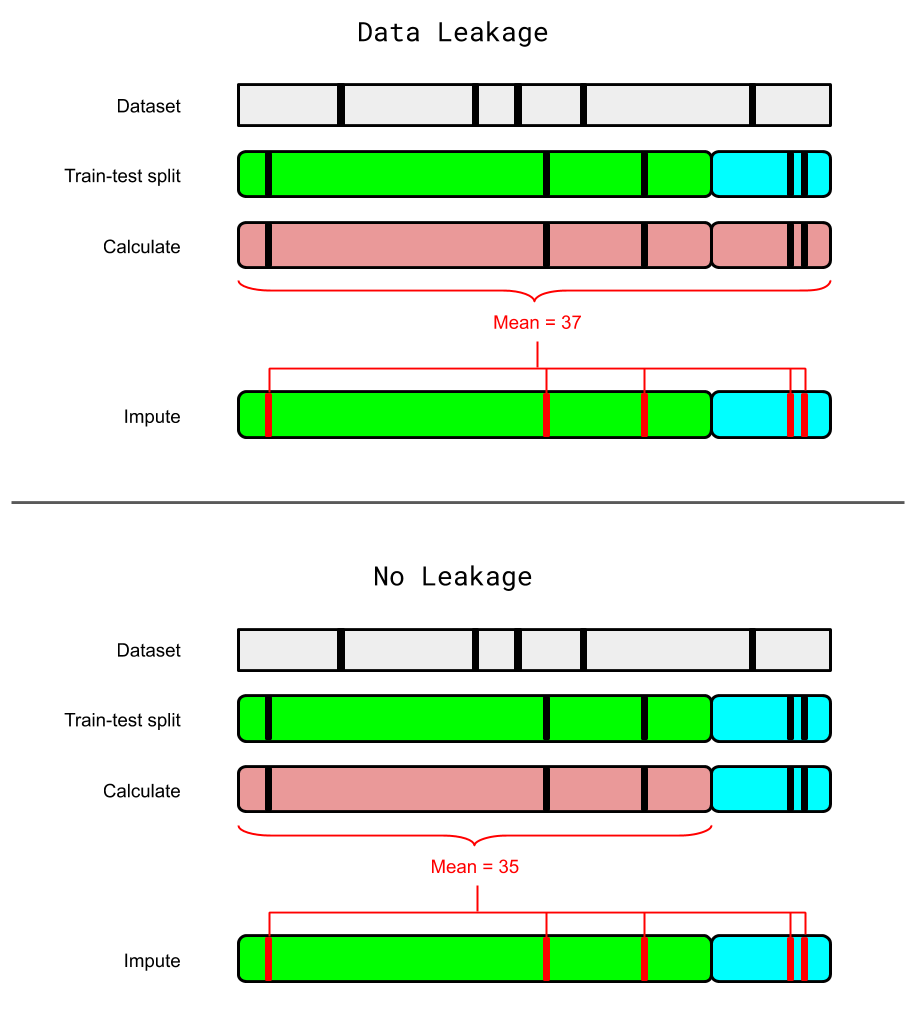

In [2]:
illustration.data_leakage

## Cek scaler dan  transform (tambahan sendiri)

In [3]:
x1 = pd.read_csv("data/cek_scaler_1.csv", index_col="id")
x2 = pd.read_csv("data/cek_scaler_2.csv", index_col="id")

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaler.fit(x1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
scaler.data_max_
scaler.data_min_

array([ 1., 10.])

In [7]:
x1_scaled = scaler.transform(x1)

In [8]:
x1_scaled

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [9]:
x2_scaled = scaler.transform(x2)

In [10]:
x2_scaled

array([[1.25, 1.25],
       [1.5 , 1.5 ],
       [1.75, 1.75],
       [2.  , 2.  ],
       [2.25, 2.25]])

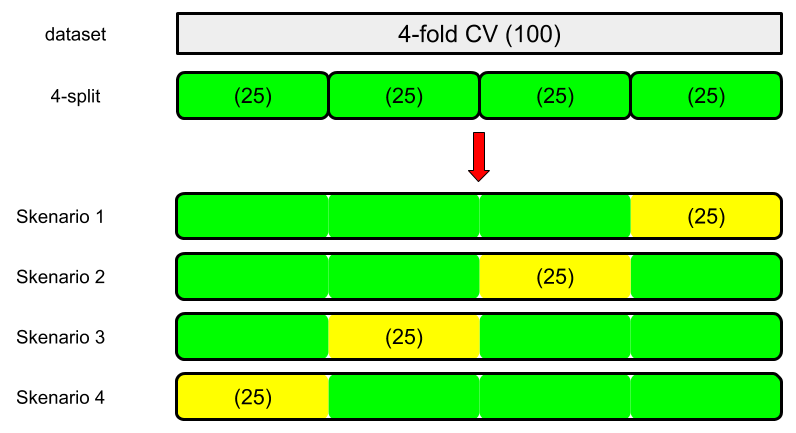

In [11]:
illustration.kfold_cv

## Siapkan data tanpa fillna dan get_dummies

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin", "Age"], inplace=True)

In [14]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [33]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Preprocessor

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
])

In [17]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, ["SibSp", "Parch", "Fare"]),
    ("categorical", categorical_pipeline, ["Pclass", "Sex", "Embarked"])
])

### Pipeline

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('impute',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                    

In [21]:
pipeline.score(X_test, y_test)

0.776536312849162

In [22]:
pipeline.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [23]:
y_test

PassengerId
566    0
161    0
554    1
861    0
242    1
      ..
881    1
92     0
884    0
474    1
638    0
Name: Survived, Length: 179, dtype: int64

In [24]:
xx = pd.read_csv("../02 - Pandas Introduction/data/cereal.csv")

In [26]:
xx.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [27]:
XX = xx.drop(columns="rating")
yy = xx.rating

In [32]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [ ]:
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)